![](http://www.excelenciasgourmet.com/sites/default/files/styles/slideshow_large/public/2017-12/vinos_0.jpg?itok=id8HxL6E)

## Introduccion


* **En este notebook, clasificaremos la calidad del vino rojo en tres categorias: bueno, regular y malo. Se explorarán los datos utilizando librerías de visualización**



* **Para prediccion se utilizaran los modelos de regresion logística, K-Nearest Neighbors, Naive Bayes,  Support Vector Machine y Random Forest.** 




**Importar librerias básicas**

In [194]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Obtener los datos en el drive compartido de dataset https://drive.google.com/drive/folders/1e-_hyo0eNIPcWKWGzoa31fy3xwhONGUB?usp=sharing**
- archivo  /wine/winequality-red.csv
- la descrpcion del archivo esta en /wine/Description.txt

*LLame al Dataframe df*

In [195]:
df = pd.read_csv('c:/Users/MANOLO/Downloads/winequality-red.csv', sep=';')

**Realice la clasificación de la calidad del vino** 

**Cree una nueva columna llamada categoria con los siguientes valores:**

* bueno si "quality" es mayor a 5
* regular si "quality" es igual a 5
* malo si "quality" es menor a 5


In [196]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [197]:
data = pd.DataFrame(df.iloc[:, 11:])
data.rename(columns={'quality': 'categoria'}, inplace=True)
conditionlist = [(data['categoria'] == 5) ,(data['categoria'] > 5),(data['categoria'] < 5)] 
choicelist = ['regular', 'bueno', 'malo'] 
data['categoria'] = np.select(conditionlist, choicelist,default='Not Specified')

*Destruya la columna "quality"*

In [198]:
df = df.drop(['quality'],axis=1)

*Muestre las primeras 3 filas de df*

In [199]:
df= pd.concat([df,data], axis = 1)
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,categoria
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,regular
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,regular
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,regular


## EDA Exploratory Data Analysis

**Exploremos los datos**

___


**Cuente cuantos datos hay en cada categoria**

In [200]:
index, counts = np.unique(
    df[["categoria"]].to_numpy(),
    return_counts=True
    )
suma = pd.Series(counts,  index)
suma

bueno      855
malo        63
regular    681
dtype: int64

*Realice un diagrama de barras que muestre los anteriores datos*

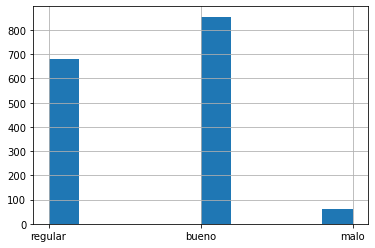

In [201]:
df['categoria'].hist()

*Realice la correlacion entre los datos. ayuda: utilice el metodo corr()*

In [202]:
correlacion = df.corr()
correlacion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


*Realice un mapa de calor con la correlación, para identificar mas facilmente colinealidad entre columnas, entre mas claras hay mayor colinealidad entre ellas*
- Utilice heatmap de la libreria seaborn
- import seaborn as sns

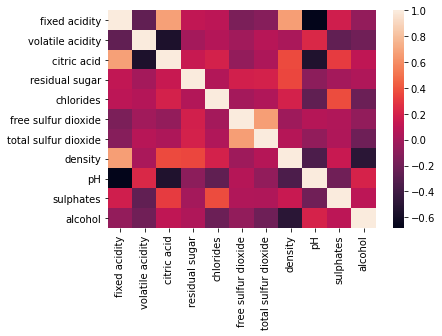

In [203]:
import seaborn as sb
heat_map = sb.heatmap(correlacion)
plt.show()

**Configure las variables X e y**

*X son todas las columnas mnos la ultima*

*y es la columna categoria*



In [204]:
x = df.iloc[:, :11]
y = df.iloc[:, 11:]

**Transforme la columna "y" utilizando el metodo LabelEncoder() de sklearn de tal manera que queden asi:**

**[0 ,1,2]**

In [302]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["bueno","regular","malo"])
y_t = le.transform(y)

C:\Users\MANOLO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [304]:
list(le.inverse_transform([0, 1, 2]))

['bueno', 'malo', 'regular']

## Entrenamiento y prueba de datos
**Divida los datos en entrenamiento prueba, dejando el 20% en prueba**

In [221]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_t, test_size = 0.2, random_state = 0)
type(x_train)
type(y_train)

numpy.ndarray

**Escale los datos para mejorar la prediccion**

In [258]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_d = sc_x.fit_transform(x_train)
x_t = sc_x.fit_transform(x_test)

## Entrene el Modelo y haga predicción con los datos de Prueba 



##  Regresión Logistica
llame a su variable de prediccion pred_RL

In [259]:
from sklearn.linear_model import LogisticRegression
clasfi1 = LogisticRegression(random_state = 0)
clasfi1.fit(x_d,y_train)
pred_RL = clasfi1.predict(x_t)

*Calcule la accuracy_score, f1, classification_report* 

In [260]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, classification_report
accuracy_score(y_test,pred_RL)

0.73125

In [261]:
f1_score(y_test,pred_RL,average ='weighted')

0.7188755175983437

In [262]:
target_names= ["bueno","regular","malo"]
classification_report(y_test,pred_RL,target_names=target_names)

'              precision    recall  f1-score   support\n\n       bueno       0.77      0.78      0.78       172\n     regular       0.00      0.00      0.00        13\n        malo       0.69      0.74      0.71       135\n\n    accuracy                           0.73       320\n   macro avg       0.49      0.51      0.50       320\nweighted avg       0.71      0.73      0.72       320\n'

## Naive Bayes
llame a su variable de prediccion pred_NB

In [263]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred_NB = gnb.fit(x_train, y_train).predict(x_test)

*Calcule la accuracy_score,  f1, classification_report* 

In [264]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, classification_report
accuracy_score(y_test,pred_NB)

0.7

In [265]:
f1_score(y_test,pred_NB,average ='weighted')

0.6945707050671743

In [266]:
target_names= ["bueno","regular","malo"]
classification_report(y_test,pred_NB,target_names=target_names)

'              precision    recall  f1-score   support\n\n       bueno       0.76      0.76      0.76       172\n     regular       0.00      0.00      0.00        13\n        malo       0.67      0.69      0.68       135\n\n    accuracy                           0.70       320\n   macro avg       0.48      0.48      0.48       320\nweighted avg       0.69      0.70      0.69       320\n'

## Support Vector Machine
llame a su variable de prediccion pred_svc

In [278]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
pred_svc = svclassifier.predict(x_test)
accuracy_score(y_test,pred_svc)

0.71875

In [279]:
f1_score(y_test,pred_svc,average ='weighted')

0.704969233960177

*Calcule la accuracy_score,  f1, classification_report* 

In [280]:
target_names= ["bueno","regular","malo"]
classification_report(y_test,pred_svc,target_names=target_names)

C:\Users\MANOLO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n       bueno       0.77      0.75      0.76       172\n     regular       0.00      0.00      0.00        13\n        malo       0.66      0.75      0.70       135\n\n    accuracy                           0.72       320\n   macro avg       0.48      0.50      0.49       320\nweighted avg       0.69      0.72      0.70       320\n'

## Random Forest
llame a su variable de prediccion pred_rfc

In [294]:
from sklearn.ensemble import RandomForestClassifier
RandomF = RandomForestClassifier(n_estimators = 500, random_state =0)
RandomF.fit(x_d,y_train)
pred_rfc = RandomF.predict(x_t)

*Calcule la accuracy_score,  f1, classification_report* 

In [292]:
accuracy_score(y_test,pred_rfc)

0.790625

In [293]:
f1_score(y_test,pred_rfc,average ='weighted')

0.7757600314611377

In [295]:
target_names= ["bueno","regular","malo"]
classification_report(y_test,pred_rfc,target_names=target_names)

'              precision    recall  f1-score   support\n\n       bueno       0.82      0.83      0.82       172\n     regular       0.00      0.00      0.00        13\n        malo       0.76      0.82      0.79       135\n\n    accuracy                           0.79       320\n   macro avg       0.53      0.55      0.54       320\nweighted avg       0.76      0.79      0.78       320\n'

## K-Nearest Neighbors
llame a su variable de prediccion pred_knn

In [238]:
from sklearn.neighbors import KNeighborsClassifier
classifer= KNeighborsClassifier(n_neighbors = 5, metric = "minkowski",p=2)
classifer.fit(x_d,y_train)
pred_knn = classifer.predict(x_t)

*Calcule la accuracy_score,  f1, classification_report* 

In [239]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, classification_report
accuracy_score(y_test,pred_knn)

0.690625

In [240]:
f1_score(y_test,pred_knn,average ='weighted')

0.6763489405652405

In [241]:
target_names= ["bueno","regular","malo"]
classification_report(y_test,pred_knn,target_names=target_names)

'              precision    recall  f1-score   support\n\n       bueno       0.71      0.77      0.74       172\n     regular       0.00      0.00      0.00        13\n        malo       0.67      0.65      0.66       135\n\n    accuracy                           0.69       320\n   macro avg       0.46      0.48      0.47       320\nweighted avg       0.66      0.69      0.68       320\n'

## Conclusion

**Cual es el mejoor modelo!**
teniendo en cuenta exactitud, y f1

In [298]:
## Random Forest

In [306]:
 RandomF.predict([[11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8]])
    ## bueno = 0

array([0])

##  Predicción
**Utilizando el modelo ganador haga la siguiente predicción de la calidad del siguiente vino rojo que tiene estas características**

X=[[11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8]]

## SALUD!

![](http://media-cdn.tripadvisor.com/media/photo-s/10/28/86/6f/wine-cheers.jpg)